In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from betareg import Beta  #Taken from https://gist.github.com/brentp/089c7d6d69d78d26437f
import statsmodels.api as sm

In [2]:
df8=pd.read_pickle("Data/df8.pickle")
df8.columns = df8.columns.str.strip()\
                         .str.lower()\
                         .str.replace('+','plus')\
                         .str.replace('^','')\
                         .str.replace(' ', '_')\
                         .str.replace('[', '')\
                         .str.replace(']', '')\
                         .str.replace('/', '')\
                         .str.replace('_mgl','')

df8.columns = df8.columns.str.replace('salinity_gl','s')\
                         .str.replace('temperature','t')

In [3]:
outMetals=df8.columns[df8.columns.str.contains('outin')]
outMetals=outMetals[~outMetals.str.contains('|'.join(['al','li']))]

In [4]:
for metal in outMetals:
    print("===="+metal)
    print(df8[metal].mean()-df8[metal].std())
    print(df8[metal].mean())
    print(df8[metal].mean()+df8[metal].std())


====sr_outin_ratio
0.20062035881026619
0.5257908570355769
0.8509613552608877
====mn_outin_ratio
0.5718417329165071
0.7452830188679245
0.9187243048193419
====ba_outin_ratio
0.42613028355806853
0.6388517319065052
0.851573180254942
====as_outin_ratio
0.14564772812816223
0.2556322162771051
0.36561670442604793
====zn_outin_ratio
0.2537763305646441
0.6081385525204168
0.9625007744761895
====rb_outin_ratio
-0.014425347943341618
0.03482587064676618
0.08407708923687397
====ni_outin_ratio
0.13061586057419156
0.5
0.8693841394258084


In [5]:
############################################################################################
for metal in outMetals:
    
    print("#=========== {} ================".format(metal))
    print("def "+metal[:2]+"Out0(P):")
    print("    return {}".format(df8[metal].mean()))
    print("")
    print("def "+metal[:2]+"Out(P):")
    
    minval=df8[metal].mean()-df8[metal].std()
    maxval=df8[metal].mean()+df8[metal].std()
    minval= minval if (minval) > 0 else 0
    maxval= maxval if (maxval) < 1.0 else 1.0
    print("    return np.random.uniform({},{})".format(minval,maxval))
    print("")

#=========== sr_outin_ratio ================
def srOut0(P):
    return 0.5257908570355769

def srOut(P):
    return np.random.uniform(0.20062035881026619,0.8509613552608877)

#=========== mn_outin_ratio ================
def mnOut0(P):
    return 0.7452830188679245

def mnOut(P):
    return np.random.uniform(0.5718417329165071,0.9187243048193419)

#=========== ba_outin_ratio ================
def baOut0(P):
    return 0.6388517319065052

def baOut(P):
    return np.random.uniform(0.42613028355806853,0.851573180254942)

#=========== as_outin_ratio ================
def asOut0(P):
    return 0.2556322162771051

def asOut(P):
    return np.random.uniform(0.14564772812816223,0.36561670442604793)

#=========== zn_outin_ratio ================
def znOut0(P):
    return 0.6081385525204168

def znOut(P):
    return np.random.uniform(0.2537763305646441,0.9625007744761895)

#=========== rb_outin_ratio ================
def rbOut0(P):
    return 0.03482587064676618

def rbOut(P):
    return np.random.

In [6]:
#=========== sr_outin_ratio ================
def srOut0(P):
    return 0.5257908570355769

def srOut(P):
    return np.random.uniform(0.20062035881026619,0.8509613552608877)

#=========== mn_outin_ratio ================
def mnOut0(P):
    return 0.7452830188679245

def mnOut(P):
    return np.random.uniform(0.5718417329165071,0.9187243048193419)

#=========== ba_outin_ratio ================
def baOut0(P):
    return 0.6388517319065052

def baOut(P):
    return np.random.uniform(0.42613028355806853,0.851573180254942)

#=========== as_outin_ratio ================
def asOut0(P):
    return 0.2556322162771051

def asOut(P):
    return np.random.uniform(0.14564772812816223,0.36561670442604793)

#=========== zn_outin_ratio ================
def znOut0(P):
    return 0.6081385525204168

def znOut(P):
    return np.random.uniform(0.2537763305646441,0.9625007744761895)

#=========== rb_outin_ratio ================
def rbOut0(P):
    return 0.03482587064676618

def rbOut(P):
    return np.random.uniform(0,0.08407708923687397)

#=========== ni_outin_ratio ================
def niOut0(P):
    return 0.5

def niOut(P):
    return np.random.uniform(0.13061586057419156,0.8693841394258084)

In [7]:
for metal in outMetals:
    m=metal[:2]
    fun0=globals()[m+'Out0']
    df8[metal+'_model']=df8.apply(lambda row: fun0(row), axis=1)
    try:
        fun=globals()[m+'Out']
        df8[[m+'0p0',m+'2p3',m+'15p9',m+'84p1',m+'97p7',m+'100p0']]=df8.apply(lambda row: pd.Series(
                                                                                                         np.percentile(
                                                                                                               [fun(row) for i in range(10000)],[0,2.3,15.9,84.1,97.7,100]
                                                                                                                       )

                                                                                                    ),axis=1)
    except KeyError:
        df8[[m+'0p0',m+'2p3',m+'15p9',m+'84p1',m+'97p7',m+'100p0']]=df8.apply(lambda row: np.nan,axis=1)
                
    df8[metal+'_model_error']=df8[m+'_outin_ratio_model']-df8[m+'_outin_ratio']

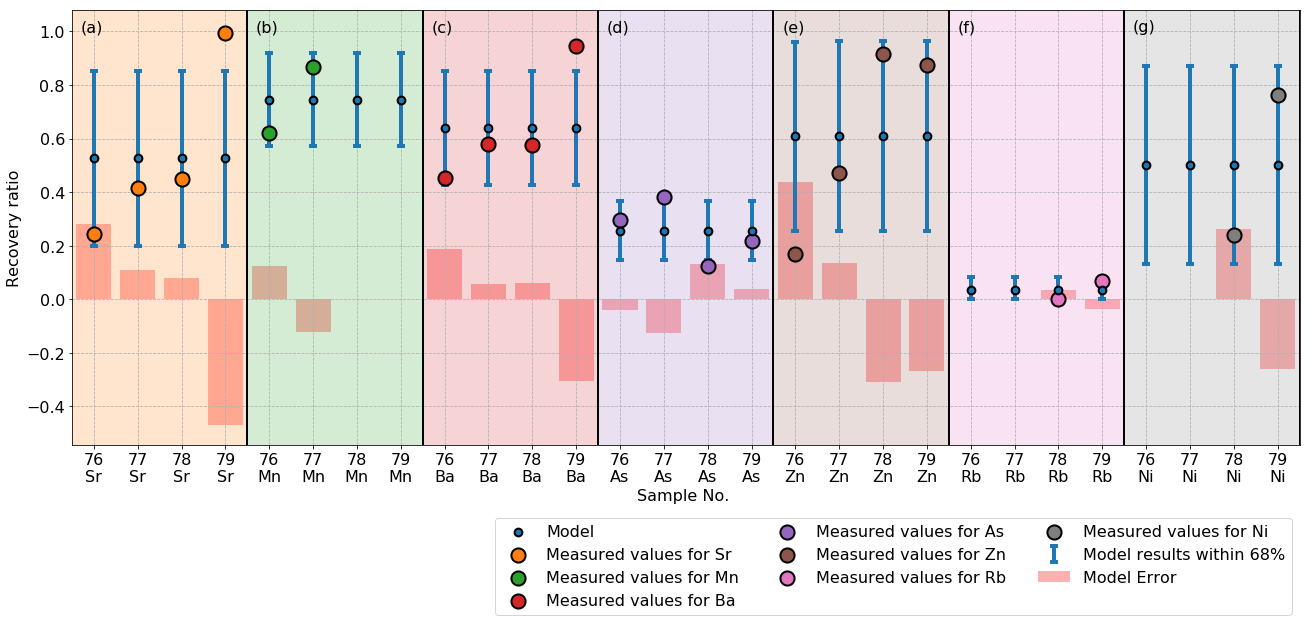

In [29]:
plt.rcParams.update({'font.size': 16})
fig,ax=plt.subplots(figsize=(22,8))
i=1
label_list=['(a)','(b)','(c)','(d)','(e)','(f)','(g)']
metalnames=[]
for (n,metal) in enumerate(outMetals):
    m    =metal[:2]
    data =df8[metal]
    error=df8[metal+'_model_error']
    m0p0 =df8[m+'0p0']
    m2p3 =df8[m+'2p3']
    m15p9=df8[m+'15p9']
    m84p1=df8[m+'84p1']
    m97p7=df8[m+'97p7']
    m100p0 =df8[m+'100p0']
    
    model=df8[metal+'_model']
    
    #N=len(model)
    #if ~data.isna().any():
    ax.errorbar(range(i,i+4),
                model.values,
                yerr=np.vstack([model.values-m0p0.values,m100p0.values-model.values]),
                capsize=4,
                capthick=4,
                linewidth=4,
                color='C0',
                fmt ='none',
                zorder=10,
                label='Model results within 68%' if n==0 else '')

    #ax.errorbar(range(i,i+4),
    #            model.values,
    #            yerr=np.vstack([model.values-m2p3.values,
    #                            m97p7.values-model.values]),
    #            capsize=0,
    #            capthick=2,
    #            color='black',
    #            fmt ='none',
    #            zorder=5,
    #            label='Model results within 95%$' if n==0 else '')
    ax.axvspan(i-0.5, i+3.5, facecolor='C'+str(n+1), alpha=0.2)
    #else:
    #    ax.axvspan(i-0.5, i+3.5, facecolor='C'+str(n+1), alpha=0.2)
     

    ax.scatter(range(i,i+4),model,color='C0',s=60,edgecolor='k',lw=2,zorder=25,label='Model' if n==0 else '')          
    ax.scatter(range(i,i+4),data,color='C'+str(n+1),s=200,edgecolor='k',lw=2,zorder=20,label='Measured values for ' +metal[0:2].capitalize())   
    ax.bar(range(i,i+4),error,color='red',alpha=0.3,zorder=0,label='Model Error' if n==0 else '') 
    ax.axvline(i+3.5,color='black',linewidth=2)
    metalnames+=[str(75+i)+'\n'+m.capitalize() for i in range(1,5)]

    ax.grid()
    m=metal[:2]
    i+=4
    ax.text(i-4-0.3,1.0,"{}".format(label_list[int(i/4)-1]))
ax.set_xticks(range(1,i));
ax.set_xlim(0.5,4*len(outMetals)+0.5)
ax.set_xticklabels(metalnames);
ax.set_ylabel("Recovery ratio")
ax.set_xlabel("Sample No. ")
ax.grid(linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=(1, -0.15))
plt.savefig("GDEx_Romanian_Model_uniform.png", bbox_inches='tight')

In [12]:
for m in outMetals:
    print(m[:2],df8[m].mean())
    #print('Model error:',df7['li_model_error'].min(),df7['li_model_error'].max(),df7['li_model_error'].median(),df7['li_model_error'].mean())

sr 0.5257908570355769
mn 0.7452830188679245
ba 0.6388517319065052
as 0.2556322162771051
zn 0.6081385525204168
rb 0.03482587064676618
ni 0.5


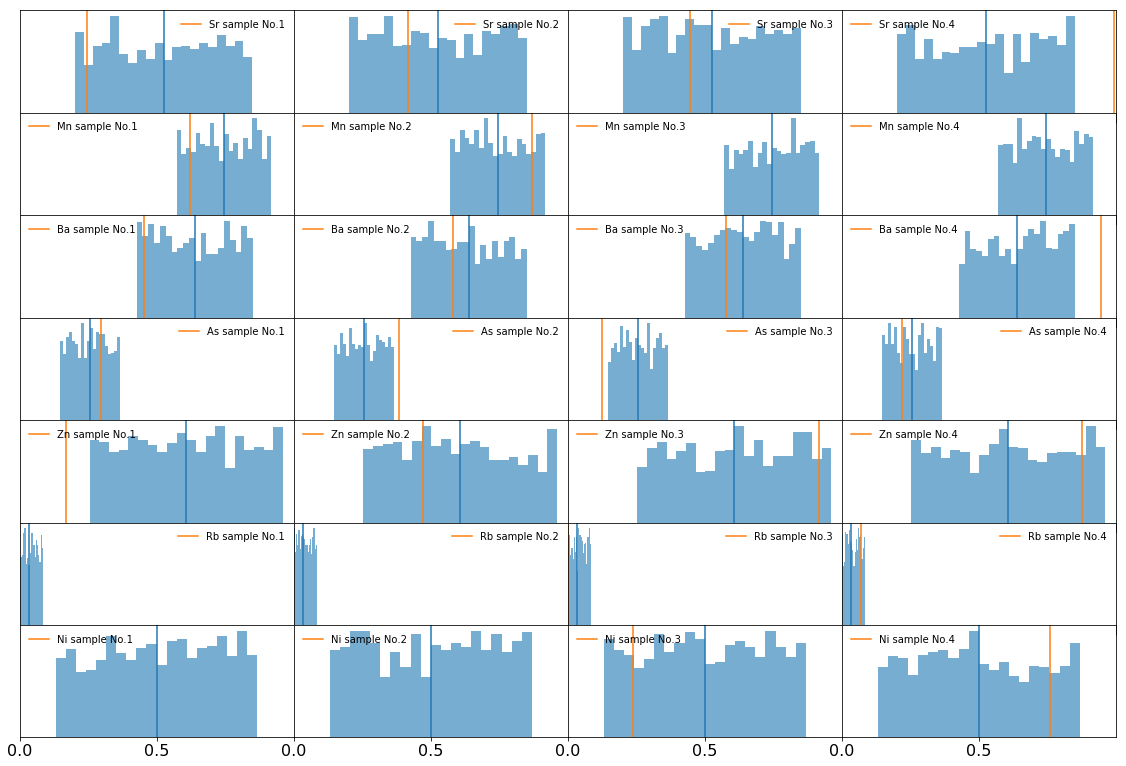

In [55]:
fig,ax=plt.subplots(7,4,figsize=(15,10),sharex=True)
n=0
for metal in outMetals:
    m=metal[:2]
    fun=globals()[m+'Out']
    for index, row in df8.iterrows():
        try: 
            ax[n//4][n%4].hist([fun(row) for i in range(1000)],20,label=None,alpha=0.6)
            ax[n//4][n%4].axvline(df8[metal].iloc[index],color='C1',label=m.capitalize()+' sample No.'+str(index+1));
            ax[n//4][n%4].axvline(df8[metal+'_model'].iloc[index],color='C0',label=None);
            ax[n//4][n%4].legend(fontsize=10,frameon=False)
        except NameError:
            ax[n//4][n%4].axvline(df8[metal].iloc[index],color='C1',label=m.capitalize()+' sample No.'+str(index+1));
            ax[n//4][n%4].axvline(df8[metal+'_model'].iloc[index],color='C0',label=None);
            ax[n//4][n%4].legend(fontsize=10,frameon=False)
        n+=1
    
for n in range(4*7):
    ax[n//4][n%4].set_yticks([])
    ax[n//4][n%4].set_xlim(0,1)
    ax[n//4][n%4].set_xticks([0,0.5])

plt.tight_layout(pad=-1)
plt.savefig("GEDx_Romanian_Model_histograms_uniform.png", bbox_inches='tight')